In [1]:
#importamos las librerias necesarias
import cv2 as cv #Libreria opencv para vision por computador
import matplotlib.pyplot as plt #Libreria para graficacion de resultados
import pandas as pd #Libreria para manejo de datos Dataframe
import numpy as np #Libreria para operaciones aritmeticas avanzadas
from tqdm import tqdm #Libreria para contabilizar tiempo de ejecucion 
import os #Libreria para ejecutar comandos de sistema operativo
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets #Libreria para ejecutar funciones interativas

In [3]:
#Funcion para calcular el fondo a partir de la secuencia de frames 
def Background(frames, thresh=10):
    height, width, depth = frames[0].shape
    B = np.zeros(shape=(int(height),int(width),int(depth)))
    #computing background
    for i in range(len(frames)):
        B += frames[i]
    B =B/len(frames)
    B  = B.astype(np.uint8)
    # ESTE CODIGO ESTA DEDICADO UNICAMENTE AL BS DEL VIDEO 110-4
    #B = cv.cvtColor(cv.imread('fotogramas2/fondos/fondo110-4.jpg'), cv.COLOR_BGR2RGB)
    #B  = B.astype(np.uint8)
    
    bs = []
    for i in range(len(frames)):
        dst = cv.absdiff(frames[i],B )
        gray = cv.cvtColor(dst, cv.COLOR_BGR2GRAY)
        th, dst_th = cv.threshold(gray, thresh, 255, cv.THRESH_BINARY)
        bs.append(dst_th)
    return bs, B

(150, 268, 3)


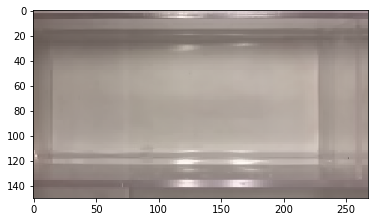

In [4]:
## Ejemplo

#Adicione aqui una ruta de prueba
path = "zebrafish/100/100-1.avi"
Video_1 = cv.VideoCapture(path)
frames_V1 = [cv.cvtColor(Video_1.read()[1], cv.COLOR_BGR2RGB) 
             for _ in range(2,int(Video_1.get(cv.CAP_PROP_FRAME_COUNT)))]
bs, B = Background(frames_V1,83)
print(B.shape)

#Visualiza el fondo
plt.imshow(B)

In [5]:
#Visualizacion de la segmenacion
interact(lambda index:plt.imshow(bs[index], cmap="gray"),
         index = widgets.IntSlider(min=0,max=(len(bs)-1),
                                   step=1,value=0))

interactive(children=(IntSlider(value=0, description='index', max=1797), Output()), _dom_classes=('widget-inte…

<function __main__.<lambda>(index)>

In [6]:
#AHORA CALCULAREMOS CENTRO DE MASA PARA UNA IMAGEN POR BACKGROUND SUSTRACTION
def CentroDeMasa_Edgar(imagen):
    height, width = imagen.shape
    num = 0
    contador = 0
    ingresar = True
    for i in range(width):#Esto es y
        for k in range(height):#Esto es X
            if(imagen[k][i]==255):
                num = num + i
                contador+=1
    if(contador != 0):
        px = num/(contador)
    else:
        px = 0 
    num = 0
    contador = 0
    for i in range(height):#Esto es y
        for k in range(width):#Esto es X
            if(imagen[i][k]==255):
                num = num + i
                contador+=1
    if(contador != 0):
        py = num/(contador)
    else:
        py = 0
    return px,py

In [7]:
#Esta funcion calcula todos los centroides de cada frame de un video
def Centroides(path):
    Video_1 = cv.VideoCapture(path)
    frames_V1 = [cv.cvtColor(Video_1.read()[1], cv.COLOR_BGR2RGB) 
                 for _ in range(2,int(Video_1.get(cv.CAP_PROP_FRAME_COUNT)))]
    bs,B =Background(frames_V1, thresh=33)
    cx = []
    cy = []
    for i in range(len(bs)):
        imagenbs = bs[i]
        px,py = CentroDeMasa_Edgar(imagenbs)
        #if(px == 0 or py == 0):
        #    cx.append(t1)
        #    cy.append(t2)
        #else:
        cx.append(px)
        cy.append(py)
        #t1 = px
        #t2 = py
    return cx,cy

In [8]:
#Codigo para guardar los centroides
def guardar_centroides(ruta,cx,cy):
    centroides = open(ruta,"w")
    centroides.write(str(cx[0])+" "+str(cy[0]))
    for i in range(len(cx)-1):
        centroides.write(" "+str(cx[i+1])+" "+str(cy[i+1]))
    centroides.close()

In [9]:
#Codigo para cargar los centroides
def cargar_centroides(ruta):
    centroides = open(ruta,"r")
    trayectoria = centroides.read()
    trayectoria = trayectoria.split(' ')
    type(trayectoria)
    i = 0 ; cx = []
    k = 1 ; cy = []
    for _ in range(int(len(trayectoria)/2)):
        cx.append(float(trayectoria[i]))
        cy.append(float(trayectoria[k]))
        i+=2
        k+=2
    return cx,cy

In [ ]:
#Visualizacion Final
index = 70
plt.imshow(frames_V1[index])
plt.scatter(cx[index],cy[index])

# Tiempo de congelacion (Proximamente)